# Import Libraries and load cleaned data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("cleaned_cardio.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


# Choose Important feature for manual model

In [2]:
features = ['age', 'ap_hi', 'ap_lo', 'bmi', 'cholesterol', 'gluc']
X = df[features].values
y = df['cardio'].values

In [3]:
X

array([[ 50.        , 110.        ,  80.        ,  21.96712018,
          1.        ,   1.        ],
       [ 55.        , 140.        ,  90.        ,  34.92767916,
          3.        ,   1.        ],
       [ 51.        , 130.        ,  70.        ,  23.50780533,
          3.        ,   1.        ],
       ...,
       [ 52.        , 180.        ,  90.        ,  31.35357879,
          3.        ,   1.        ],
       [ 61.        , 135.        ,  80.        ,  27.09925101,
          1.        ,   2.        ],
       [ 56.        , 120.        ,  80.        ,  24.91349481,
          2.        ,   1.        ]])

In [4]:
y

array([0, 1, 1, ..., 1, 1, 0])

# Feature Scale (Make data same size)

In [5]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [6]:
X

array([[-0.41728956, -1.00774916, -0.13361292, -1.07524337, -0.53614369,
        -0.39382421],
       [ 0.32123059,  0.81818516,  0.94176557,  1.49880056,  2.41305665,
        -0.39382421],
       [-0.26958553,  0.20954038, -1.20899142, -0.76925416,  2.41305665,
        -0.39382421],
       ...,
       [-0.1218815 ,  3.25276425,  0.94176557,  0.78896302,  2.41305665,
        -0.39382421],
       [ 1.20745478,  0.51386277, -0.13361292, -0.05597173, -0.53614369,
         1.35891415],
       [ 0.46893462, -0.39910439, -0.13361292, -0.49007588,  0.93845648,
        -0.39382421]])

# Train-Test Split Manually

In [7]:
np.random.seed(42)

# Shuffle
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# 80% Train | 20% Test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Add Bias Term (x0 = 1) Manually

In [8]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [9]:
X_train

array([[ 1.        ,  1.65056687,  2.64411948, ...,  0.47263517,
        -0.53614369, -0.39382421],
       [ 1.        ,  1.50286284,  0.20954038, ..., -0.23083038,
         2.41305665, -0.39382421],
       [ 1.        ,  0.61663866, -0.39910439, ..., -0.24874663,
        -0.53614369, -0.39382421],
       ...,
       [ 1.        , -0.1218815 , -0.39910439, ..., -0.63995918,
        -0.53614369, -0.39382421],
       [ 1.        , -1.74662583, -0.39910439, ..., -0.69630432,
        -0.53614369, -0.39382421],
       [ 1.        ,  0.91204672,  2.03547471, ..., -0.76925416,
         0.93845648, -0.39382421]])

In [10]:
X_test

array([[ 1.        ,  0.17352656,  1.42682993, ...,  1.15125074,
        -0.53614369, -0.39382421],
       [ 1.        ,  0.02582253,  2.03547471, ...,  1.77693742,
         0.93845648,  1.35891415],
       [ 1.        ,  0.32123059, -0.39910439, ...,  2.12135164,
        -0.53614369, -0.39382421],
       ...,
       [ 1.        , -1.5989218 ,  0.20954038, ..., -0.70949664,
        -0.53614369, -0.39382421],
       [ 1.        , -1.45121777, -1.00774916, ..., -0.62751943,
        -0.53614369, -0.39382421],
       [ 1.        ,  0.02582253, -0.39910439, ...,  0.91734611,
        -0.53614369, -0.39382421]])

# Logistic Regression Mathematics

In [11]:
# 1) Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2) Prediction Function
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

# Loss Function OR Binary Cross Entropy

In [12]:
def loss(y, y_pred):
    epsilon = 1e-9  # to avoid log(0)
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

# Gradient Descent

In [13]:
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])
    losses = []

    for i in range(epochs):
        y_pred = sigmoid(np.dot(X, weights))          #  prediction
        gradient = np.dot(X.T, (y_pred - y)) / y.size #  slope
        weights -= lr * gradient                      #  update weights
        losses.append(loss(y, y_pred))                #  track loss

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {losses[-1]:.4f}")

    return weights, losses


# Train the model

In [14]:
weights, losses = train_logistic_regression(X_train, y_train, lr=0.05, epochs=1500)
print("Final Weights:", weights)

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5712
Epoch 200, Loss: 0.5651
Epoch 300, Loss: 0.5635
Epoch 400, Loss: 0.5627
Epoch 500, Loss: 0.5622
Epoch 600, Loss: 0.5619
Epoch 700, Loss: 0.5617
Epoch 800, Loss: 0.5616
Epoch 900, Loss: 0.5615
Epoch 1000, Loss: 0.5615
Epoch 1100, Loss: 0.5615
Epoch 1200, Loss: 0.5614
Epoch 1300, Loss: 0.5614
Epoch 1400, Loss: 0.5614
Final Weights: [ 0.01986091  0.34696305  0.91116499  0.1202111   0.14512267  0.33393862
 -0.06671657]


# Plot loss curve

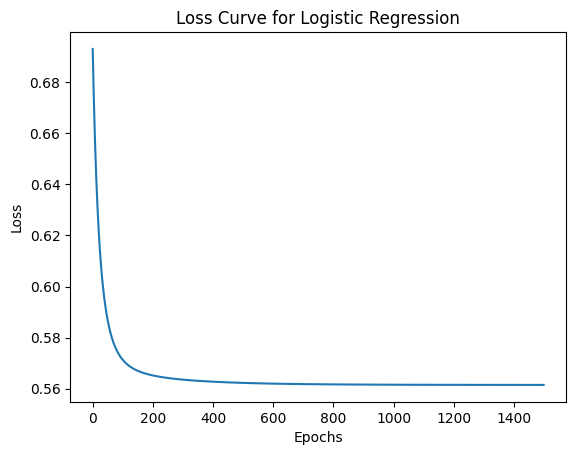

In [15]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Loss Curve for Logistic Regression")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Performance Evaluation 

# Convert Probabilities into class labels

In [16]:
y_pred_test = predict(X_test, weights)
y_pred_test = (y_pred_test >= 0.5).astype(int)

In [17]:
y_pred_test

array([1, 1, 0, ..., 0, 0, 0])

# Accuracy Calculation

In [18]:
accuracy = np.mean(y_pred_test == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7248444932308818


# Manual Confusion Matrix

In [19]:
def confusion_matrix(y, y_pred):
    tp = np.sum((y == 1) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fp = np.sum((y == 0) & (y_pred == 1))
    fn = np.sum((y == 1) & (y_pred == 0))
    return tp, tn, fp, fn

tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test)
print("TP, TN, FP, FN:", tp, tn, fp, fn)

TP, TN, FP, FN: 4420 5485 1452 2308


# Precision, Recall, F1 Score

In [20]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.752724795640327
Recall: 0.6569560047562426
F1 Score: 0.7015873015873016


# Visualization of Confusion Matrix

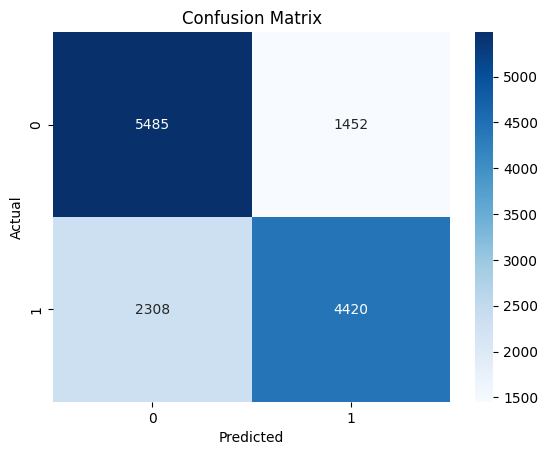

In [22]:
import seaborn as sns

cm = np.array([[tn, fp], [fn, tp]])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics Bar Chart

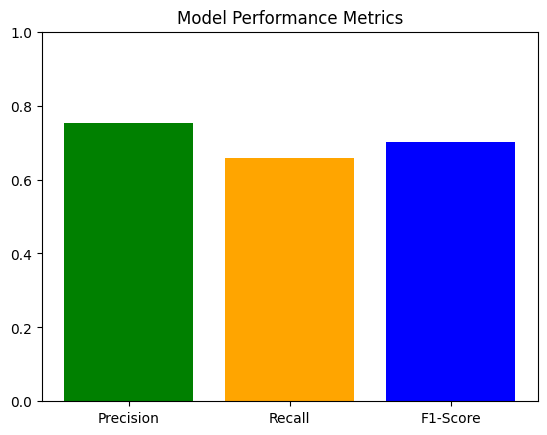

In [23]:
metrics = {
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

plt.bar(metrics.keys(), metrics.values(), color=["green", "orange", "blue"])
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.show()